In [1]:
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics
import sklearn

In [2]:
labels_df = pd.read_csv('../../stats/all-labels.csv')
display(labels_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1
...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0


In [4]:
face_sync_df = pd.read_csv('../../stats/sync-vid-preds-211128-0037.csv')
display(face_sync_df)

,filename,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,std_pred,max_pred,min_pred,face_no
0,3dbe8314b86284eb.mp4,0.822178,0.982348,0.739257,0.998166,0.277643,0.999999,0.130903,1
1,1b8d86fe4003ec39.mp4,0.745422,0.762232,0.523828,0.994609,0.257799,0.999998,0.089503,0
2,cabecda3272f85d1.mp4,0.772848,0.914945,0.639099,0.993220,0.277203,0.999999,0.147270,0
3,8a715b8d45ad42bb.mp4,0.811835,0.922679,0.762772,0.998650,0.255419,1.000000,0.178258,0
4,751dc59c35c1809d.mp4,0.739572,0.952386,0.439507,0.995608,0.314194,1.000000,0.174245,0
...,...,...,...,...,...,...,...,...,...
3262,aace3bd7f5c15109.mp4,0.733946,0.892130,0.439780,0.978442,0.296433,0.999944,0.162567,0
3263,a906a11a463e2fd1.mp4,0.786667,0.922733,0.607404,0.997526,0.243598,0.999995,0.282939,0
3264,2ec139efc01c35b1.mp4,0.744051,0.970852,0.473462,0.992651,0.331526,1.000000,0.051429,1
3265,0e4acde05b3af5b6.mp4,0.728902,0.916330,0.465609,0.995800,0.343356,1.000000,0.109635,0


In [5]:
face_sync_df = face_sync_df.groupby('filename', sort=False).agg(min)
sync_df = pd.merge(
    left=labels_df, right=face_sync_df, 
    left_on='filename', right_on='filename'
)
# print(np.unique(sync_df['face_no']))
display(sync_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,std_pred,max_pred,min_pred,face_no
0,18351609de111566.mp4,1,0.0,0.0,1,0,0.727888,0.828067,0.484502,0.997952,0.289662,1.000000,0.128646,0
1,5026338ed12800bc.mp4,1,0.0,0.0,1,0,0.690797,0.762593,0.414618,0.969987,0.291791,1.000000,0.142546,0
2,5968740ef3396f0c.mp4,1,0.0,0.0,1,0,0.698029,0.870180,0.331637,0.996459,0.320166,0.999999,0.151573,0
3,50e301013618719d.mp4,1,0.0,0.0,1,0,0.618451,0.611920,0.273184,0.995902,0.357822,1.000000,0.143339,0
4,bc6dd15cfdfe6175.mp4,1,0.0,0.0,1,0,0.687362,0.786565,0.390265,0.994647,0.313404,1.000000,0.094030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.696598,0.839373,0.445342,0.983075,0.303355,0.999985,0.109241,0
3263,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.738439,0.862027,0.448404,0.969688,0.267802,1.000000,0.225416,0
3264,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.728983,0.733337,0.565846,0.980536,0.252084,0.999921,0.186406,0
3265,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.821663,0.957173,0.735233,0.997047,0.229885,1.000000,0.279926,0


(array([0.03729537, 0.        , 0.07459074, 0.        , 0.07459074,
        0.1118861 , 0.07459074, 0.1118861 , 0.18647684, 0.22377221,
        0.18647684, 0.33565831, 0.78320273, 0.9323842 , 1.00697493,
        1.30533788, 1.52911009, 2.31231281, 2.75985723, 3.46846922,
        4.21437658, 4.13978584, 3.87871827, 5.14676078, 5.85537277,
        6.89964307, 6.41480329, 7.34718749, 6.82505234, 7.6828458 ,
        7.04882454, 5.9299635 , 6.37750792, 5.55700983, 4.73651173,
        3.99060437, 3.0209248 , 3.05822017, 2.12583597, 1.90206377,
        1.08156567, 1.0442703 , 0.85779346, 0.55943052, 0.33565831,
        0.14918147, 0.03729537, 0.        , 0.03729537, 0.07459074]),
 array([0.5292515 , 0.53745872, 0.54566594, 0.55387315, 0.56208037,
        0.57028759, 0.57849481, 0.58670203, 0.59490924, 0.60311646,
        0.61132368, 0.6195309 , 0.62773812, 0.63594533, 0.64415255,
        0.65235977, 0.66056699, 0.66877421, 0.67698142, 0.68518864,
        0.69339586, 0.70160308, 0.7098103 , 0.

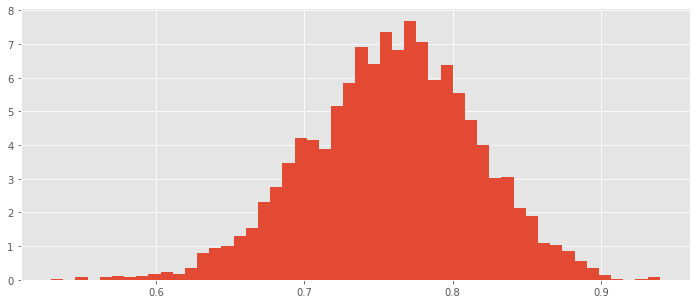

In [7]:
preds = sync_df['mean_pred']
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.hist(preds, density=True, bins=50)  # density=False would make counts

In [8]:
rsync_df = sync_df[
    (sync_df['swap_fake'] == 1) |
    (sync_df['label'] == 0)
]
display(rsync_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,std_pred,max_pred,min_pred,face_no
0,18351609de111566.mp4,1,0.0,0.0,1,0,0.727888,0.828067,0.484502,0.997952,0.289662,1.000000,0.128646,0
1,5026338ed12800bc.mp4,1,0.0,0.0,1,0,0.690797,0.762593,0.414618,0.969987,0.291791,1.000000,0.142546,0
2,5968740ef3396f0c.mp4,1,0.0,0.0,1,0,0.698029,0.870180,0.331637,0.996459,0.320166,0.999999,0.151573,0
3,50e301013618719d.mp4,1,0.0,0.0,1,0,0.618451,0.611920,0.273184,0.995902,0.357822,1.000000,0.143339,0
4,bc6dd15cfdfe6175.mp4,1,0.0,0.0,1,0,0.687362,0.786565,0.390265,0.994647,0.313404,1.000000,0.094030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.696598,0.839373,0.445342,0.983075,0.303355,0.999985,0.109241,0
3263,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.738439,0.862027,0.448404,0.969688,0.267802,1.000000,0.225416,0
3264,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.728983,0.733337,0.565846,0.980536,0.252084,0.999921,0.186406,0
3265,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.821663,0.957173,0.735233,0.997047,0.229885,1.000000,0.279926,0


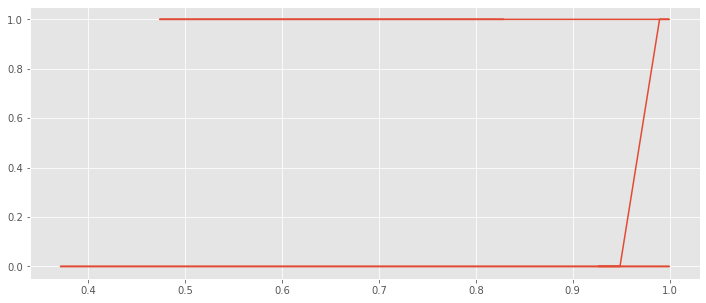

In [10]:
r_preds, r_labels = rsync_df['median_pred'], rsync_df['label']
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.plot(r_preds, r_labels)

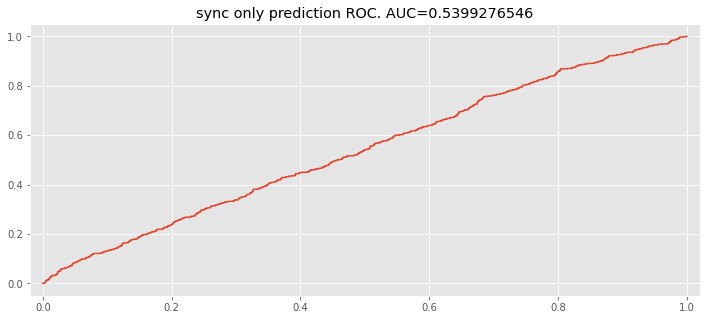

In [11]:
fpr, tpr, _ = sklearn.metrics.roc_curve(r_labels, r_preds)
auc = sklearn.metrics.roc_auc_score(r_labels, r_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("sync only prediction ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

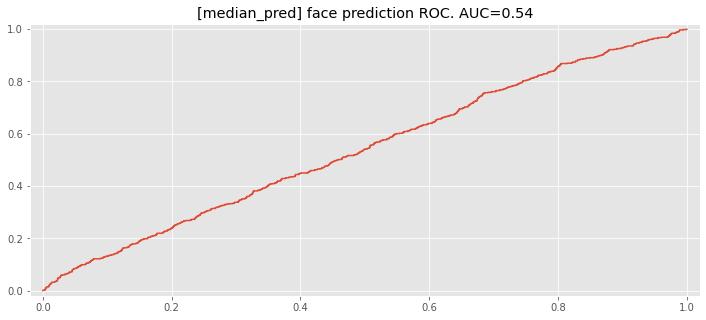

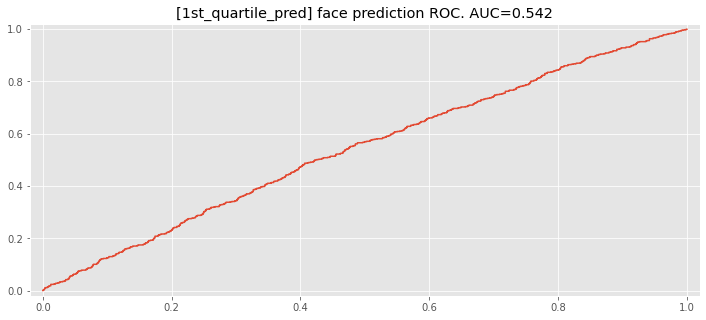

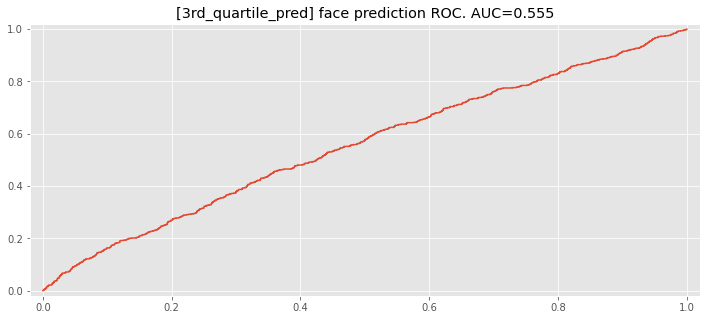

In [13]:
for metric in ['median_pred', '1st_quartile_pred', '3rd_quartile_pred']:
    labels = rsync_df['label'].to_numpy()
    sync_preds = rsync_df[metric].to_numpy()
    fpr, tpr, _ = sklearn.metrics.roc_curve(labels, sync_preds)
    auc = sklearn.metrics.roc_auc_score(labels, sync_preds)

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 5))
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.title(f"[{metric}] face prediction ROC. AUC="+str(round(auc, 3)))
    plt.plot(fpr, tpr)